<a href="https://colab.research.google.com/github/Rizki-SS/PCVK_Genap/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

1. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV) secara  manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas

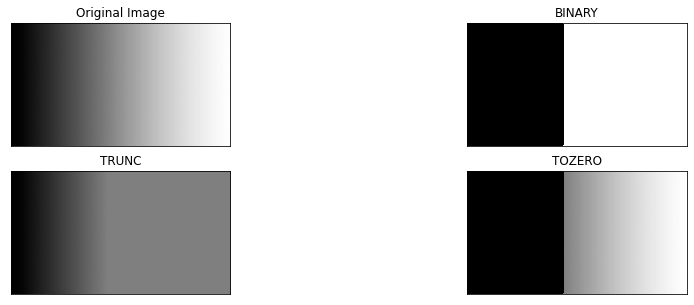

In [7]:
dir = ('/content/drive/MyDrive/Colab Notebooks/gradient.jpg')
img = cv2.imread(dir) 
thresholdBinary = cv2.imread(dir) 
thresholdTrunc = cv2.imread(dir) 
thresholdTozero = cv2.imread(dir) 

threshold = 127

#Threshold Binary
thresholdBinary[img>threshold] = 255
thresholdBinary[img<=threshold] = 0

#Threshold Truncate 
thresholdTrunc[img>threshold] = threshold

#Threshold Tozero 
thresholdTozero[img<=threshold] = 0

names = ['Original Image','BINARY','TRUNC','TOZERO'] 
images = [img, thresholdBinary, thresholdTrunc, thresholdTozero]


plt.figure(figsize = (15,5)) 
for i in range(len(images)):
  plt.subplot(2,2,i+1),plt.imshow(images[i],'gray', interpolation='nearest') 
  plt.title(names[i])
  plt.xticks([]),plt.yticks([]) 
plt.show()

2. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai 
threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image lena_gs_lc2.jpg agar benar2 terlihat beda antara hasil otsu’s dengan global threshold biasa) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


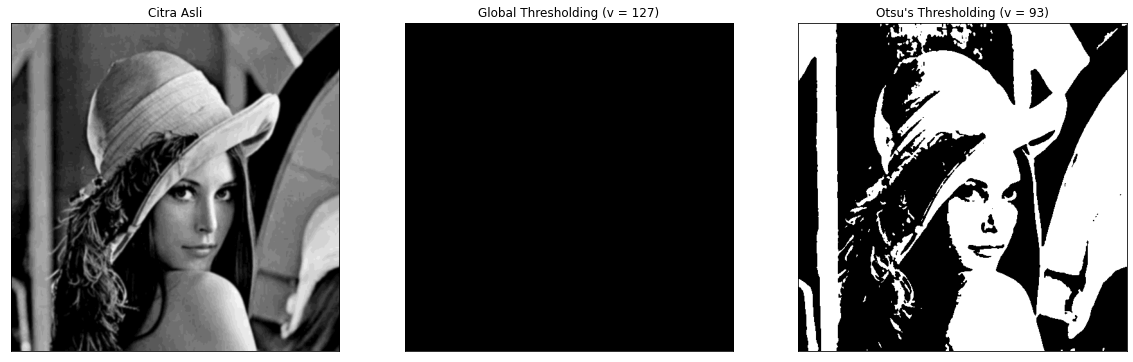

In [8]:
dir = ('/content/drive/MyDrive/Colab Notebooks/lena_gs_lc2.jpg')

img = cv2.imread(dir,0) 
blur = cv2. GaussianBlur (img, (5,5),0)

histogram = cv2.calcHist([blur],[0],None,[256], [0,256]) 
histogram_norm = histogram.ravel()/histogram.max() 
Q = histogram_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
varmax = 0 
fn_min = np.inf 
threshold = -1

for i in range(0,255):
  wb += histogram[i]
  wf = (img.shape[0]*img.shape[1]) - wb 
  sumb += (i*histogram[i]) 
  mb = sumb / wb 
  mf = (sumb - sumb)/wf 
  betweenvar = wb * wf * (mb - mf) * (mb - mf) 
  if (betweenvar>varmax):
    varmax = betweenvar
    threshold = i 

x = ("Otsu's Thresholding (v = ")+str(threshold)+")" 
ret, thresholdGlobal = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
ret, thresholdOtsu = cv2.threshold(blur, threshold, 255, cv2. THRESH_BINARY)

names = ['Citra Asli', 'Global Thresholding (v = 127)', x] 
images = [blur, thresholdGlobal, thresholdOtsu]

plt. figure(figsize = (20,15)) 
for i in range(len(names)):
    plt.subplot(1,3,i+1),plt.imshow(images[i], 'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([]) 
plt.show()

3. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image Lily atau Leaves yang sudah disediakan di folder images.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

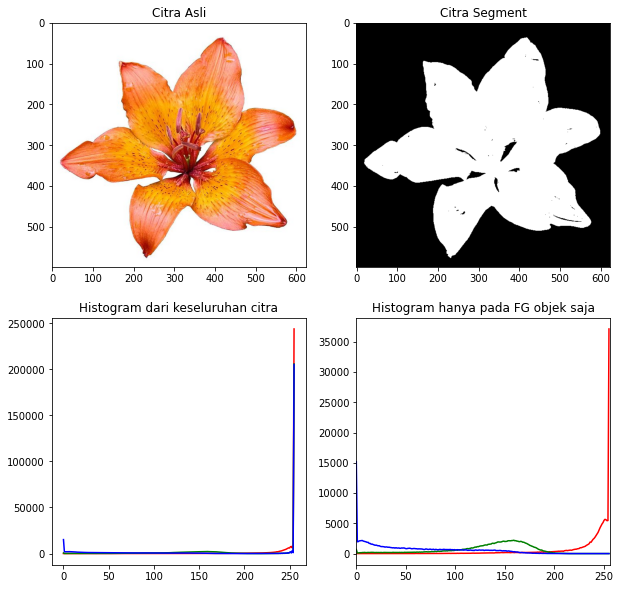

In [9]:
dir = ('/content/drive/MyDrive/Colab Notebooks/lily.jpg')

img = cv2.imread(dir) 
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 
color = ('r','g','b') 
for i,col in enumerate(color):
    histogramSeluruhCitra = cv2.calcHist([img],[i],None,[256],[0,256]) 
    plt.subplot(2,2,3),plt.plot(histogramSeluruhCitra,color = col) 
    plt.title('Histogram dari keseluruhan citra') 
    histogramForeground = cv2.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(histogramForeground,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256]) 
plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja) 

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7e816f2a10>,
 <matplotlib.image.AxesImage at 0x7f7e7fd201d0>)

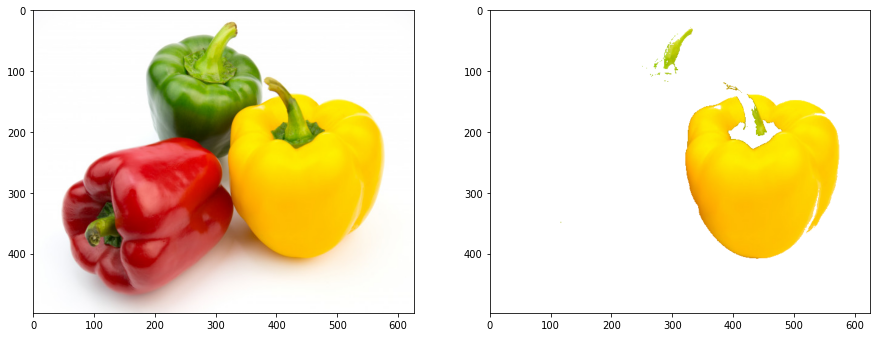

In [10]:
dir = ('/content/drive/MyDrive/Colab Notebooks/peppers.jpg')
img = cv2.imread(dir) 
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3)) 
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

segmented_image = np.copy(img) 
segmented_image0= segmented_image.reshape((-1, 3)) 
segmented_image0[labels != 1] = [255, 255, 255]
segmented_image0 = segmented_image0.reshape(img.shape)

plt.figure(figsize = (15,12)) 
plt.subplot(1,2,1),plt.imshow(img) 
plt.subplot(1,2,2),plt.imshow(segmented_image0)